In [31]:
from prophet import Prophet 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from ucimlrepo import fetch_ucirepo 

In [32]:
import pandas as pd
from prophet import Prophet

# Load the data
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Hamoye internship\Stage E\individual+household+electric+power+consumption\household_power_consumption.txt", 
                 sep=';')
df

C:\Users\HP\AppData\Local\Temp\ipykernel_17712\1410074642.py:5: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Hamoye internship\Stage E\individual+household+electric+power+consumption\household_power_consumption.txt",


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [50]:

import pandas as pd
import numpy as np

# Read the CSV file and replace '?' with NaN
df_clean = pd.read_csv(
    r"C:\Users\HP\OneDrive\Desktop\Hamoye internship\Stage E\individual+household+electric+power+consumption\household_power_consumption.txt",
    sep=';',
    na_values='?',
    low_memory=False
)

# Check the first few rows to ensure data is read correctly
print(df_clean.head())

# Replace '?' with NaN and inspect data types
print(df_clean.dtypes)



         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  
Date                      object
Time                      object
Global_active_power      float64


In [51]:
# Define data types for numeric columns
numeric_columns = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2',
    'Sub_metering_3'
]

# Convert numeric columns to float
df_clean[numeric_columns] = df_clean[numeric_columns].astype(float)

# Parse the datetime columns and combine them into a single column
df_clean['dt'] = pd.to_datetime(df_clean['Date'] + ' ' + df_clean['Time'], format='%d/%m/%Y %H:%M:%S')

# Drop the original 'Date' and 'Time' columns
df_clean.drop(columns=['Date', 'Time'], inplace=True)

# Check the first few rows to ensure data types are correct
print(df_clean.head())
print(df_clean.dtypes)


   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3                  dt  
0             0.0             1.0            17.0 2006-12-16 17:24:00  
1             0.0             1.0            16.0 2006-12-16 17:25:00  
2             0.0             2.0            17.0 2006-12-16 17:26:00  
3             0.0             1.0            17.0 2006-12-16 17:27:00  
4             0.0             1.0            17.0 2006-12-16 17:28:00  
Global_active_power             float64
Global_reactive_power           float64
Voltage                        

In [52]:
df_clean.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dt                           0
dtype: int64

In [53]:
# Drop rows with any null values
df_clean.dropna(inplace=True)

# Check if there are still any null values
print(df_clean.isnull().sum())



Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dt                       0
dtype: int64


In [54]:
# Ensure the datetime column is properly formatted
df_clean['dt'] = pd.to_datetime(df_clean['dt'])
df_clean

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,dt
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...
2075254,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [55]:
# Set 'dt' as the index for resampling
df_clean.set_index('dt', inplace=True)
df_clean

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [56]:
# Resample the data to daily frequency and sum the values
df_daily = df_clean.resample('D').sum().reset_index()

# Print the first few rows of the resampled DataFrame to check the result
print(df_daily.head())

          dt  Global_active_power  Global_reactive_power    Voltage  \
0 2006-12-16             1209.176                 34.922   93552.53   
1 2006-12-17             3390.460                226.006  345725.32   
2 2006-12-18             2203.826                161.792  347373.64   
3 2006-12-19             1666.194                150.942  348479.01   
4 2006-12-20             2225.748                160.998  348923.61   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0            5180.8             0.0           546.0          4926.0  
1           14398.6          2033.0          4187.0         13341.0  
2            9247.2          1063.0          2621.0         14018.0  
3            7094.0           839.0          7602.0          6197.0  
4            9313.0             0.0          2648.0         14063.0  


21:00:58 - cmdstanpy - INFO - Chain [1] start processing
21:00:58 - cmdstanpy - INFO - Chain [1] done processing


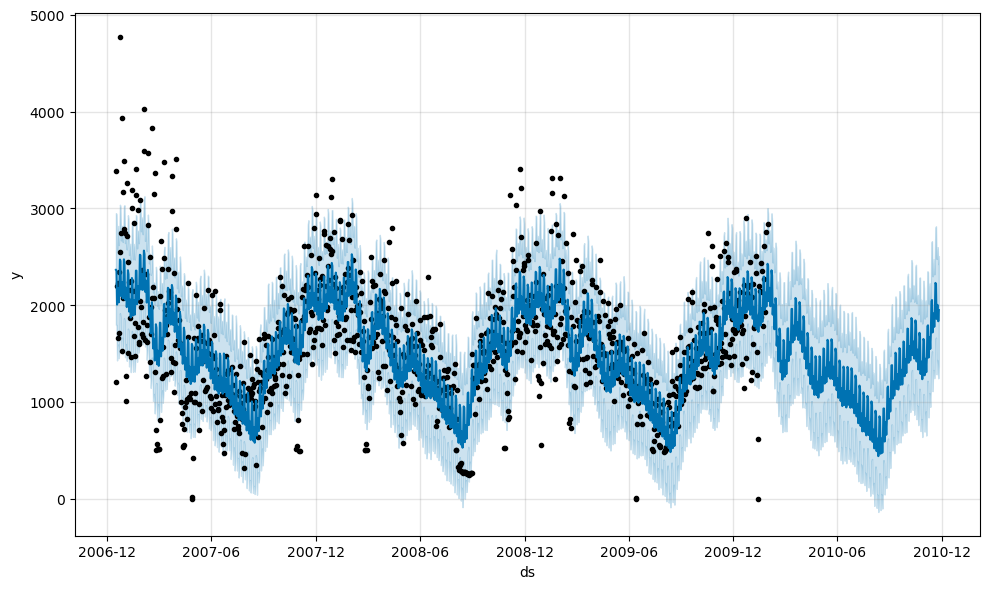

In [57]:
# Rename columns for Prophet
df_daily = df_daily.rename(columns={'dt': 'ds', 'Global_active_power': 'y'})

# Split the data into training and test sets
x = len(df_daily)
train = df_daily.iloc[:x-300]
test = df_daily.iloc[x-300:]

# Initialize and train the Prophet model
model = Prophet()
model.fit(train)

# Make future dataframe and predictions
future = model.make_future_dataframe(periods=300)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

In [58]:
# Rename columns for Prophet
df_daily = df_daily.rename(columns={
    'dt': 'ds', 
    'Global_active_power': 'y',
    'Global_reactive_power': 'add1',
    'Voltage': 'add2',
    'Global_intensity': 'add3',
    'Sub_metering_1': 'add4',
    'Sub_metering_2': 'add5',
    'Sub_metering_3': 'add6'
})

# Print the first few rows of the resampled DataFrame to check the result
print(df_daily.head())

          ds         y     add1       add2     add3    add4    add5     add6
0 2006-12-16  1209.176   34.922   93552.53   5180.8     0.0   546.0   4926.0
1 2006-12-17  3390.460  226.006  345725.32  14398.6  2033.0  4187.0  13341.0
2 2006-12-18  2203.826  161.792  347373.64   9247.2  1063.0  2621.0  14018.0
3 2006-12-19  1666.194  150.942  348479.01   7094.0   839.0  7602.0   6197.0
4 2006-12-20  2225.748  160.998  348923.61   9313.0     0.0  2648.0  14063.0


In [59]:
# Split the data into training and test sets
x = len(df_daily)
train = df_daily.iloc[:x-300]
test = df_daily.iloc[x-300:]

# Print the first few rows of the train and test sets to check the split
print(train.head())
print(test.head())

          ds         y     add1       add2     add3    add4    add5     add6
0 2006-12-16  1209.176   34.922   93552.53   5180.8     0.0   546.0   4926.0
1 2006-12-17  3390.460  226.006  345725.32  14398.6  2033.0  4187.0  13341.0
2 2006-12-18  2203.826  161.792  347373.64   9247.2  1063.0  2621.0  14018.0
3 2006-12-19  1666.194  150.942  348479.01   7094.0   839.0  7602.0   6197.0
4 2006-12-20  2225.748  160.998  348923.61   9313.0     0.0  2648.0  14063.0
             ds         y     add1       add2     add3    add4    add5  \
1142 2010-01-31  1799.196  171.516  350499.80   7491.2  1715.0  1380.0   
1143 2010-02-01  1693.778  124.784  350829.71   6995.2  1111.0   367.0   
1144 2010-02-02  2157.432  131.168  350399.26   8853.6     0.0   382.0   
1145 2010-02-03  2903.014  183.692  349038.83  12052.8  2234.0  8423.0   
1146 2010-02-04  2316.270  141.848  348625.14   9567.2  1074.0   532.0   

         add6  
1142  12569.0  
1143  14623.0  
1144  21536.0  
1145  21130.0  
1146  23743.0

In [60]:
# Initialize the Prophet model
model = Prophet()

# Add the additional regressors
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

# Fit the model
model.fit(train)

21:10:37 - cmdstanpy - INFO - Chain [1] start processing
21:10:38 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
# Make future dataframe for 300 days
future = model.make_future_dataframe(periods=300)

# Add the additional regressors to the future dataframe
future = pd.merge(future, df_daily[['ds', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']], on='ds', how='left')

# Make predictions
forecast = model.predict(future)

# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
forecast.info()

             ds         yhat   yhat_lower   yhat_upper
1437 2010-11-22  2087.146592  1874.779811  2304.919669
1438 2010-11-23  1628.218982  1416.277804  1845.859773
1439 2010-11-24  1835.243625  1617.478077  2057.414524
1440 2010-11-25  1457.709125  1241.226816  1682.644752
1441 2010-11-26  1524.762475  1308.642322  1745.674692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ds                               1442 non-null   datetime64[ns]
 1   trend                            1442 non-null   float64       
 2   yhat_lower                       1442 non-null   float64       
 3   yhat_upper                       1442 non-null   float64       
 4   trend_lower                      1442 non-null   float64       
 5   trend_upper                      1442 non-null   float64       
 6   add1  

Mean Absolute Error: 15.34726238445028


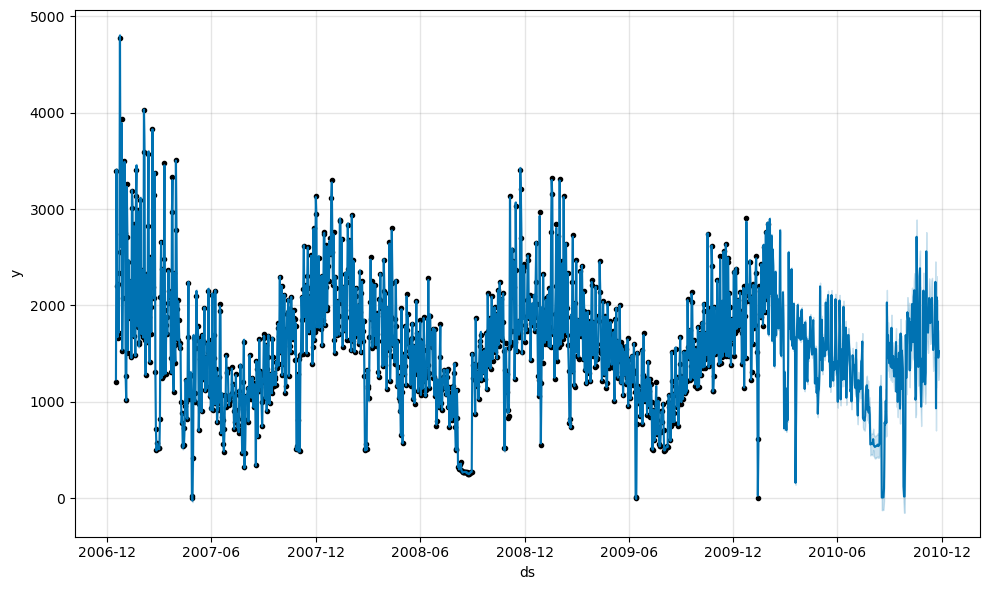

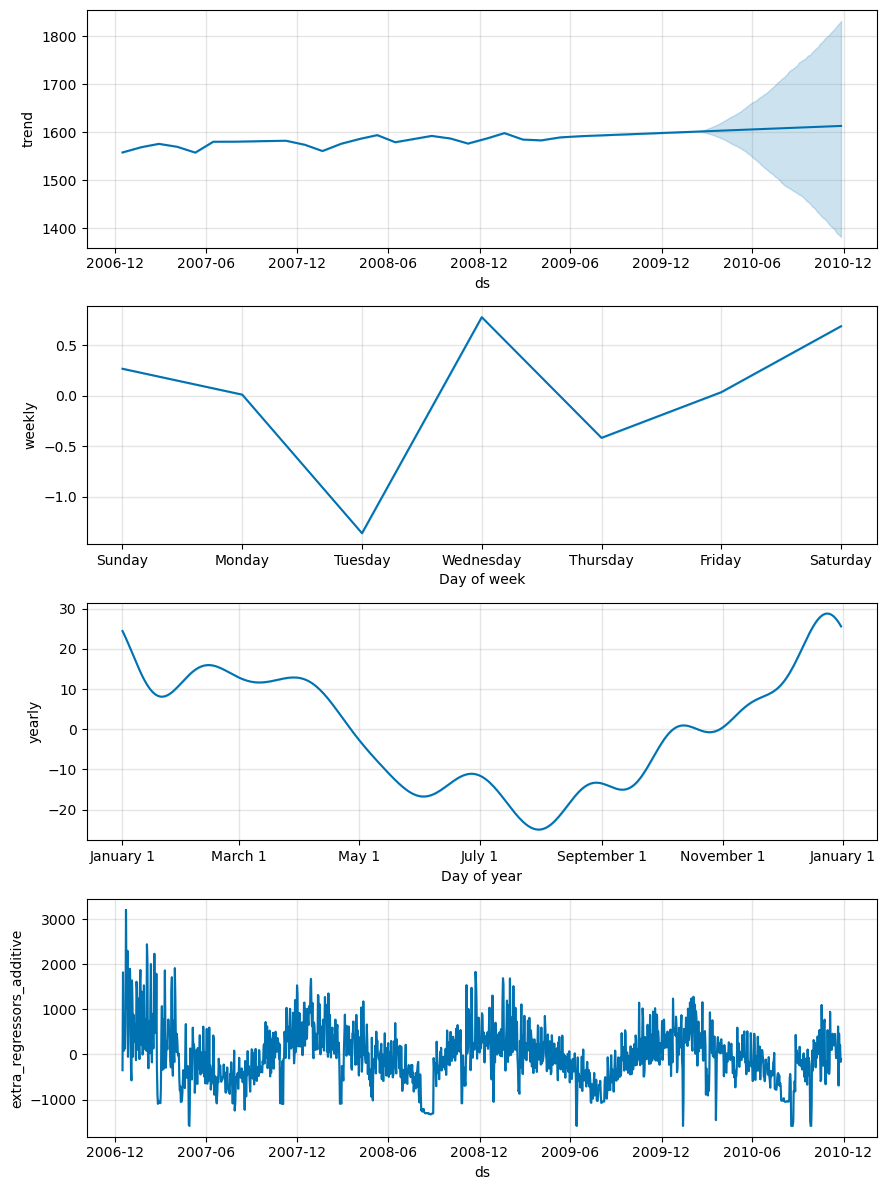

In [62]:
# Plot the forecast
fig = model.plot(forecast)

# Plot the components of the forecast
fig2 = model.plot_components(forecast)

# Evaluate the performance (optional)
# For example, you can compare the actual values in the test set with the predicted values
predicted = forecast.tail(300)['yhat'].values
actual = test['y'].values

# Calculate the mean absolute error (MAE) as an example
mae = np.mean(np.abs(predicted - actual))
print(f'Mean Absolute Error: {mae}')

In [65]:
# Assuming you have calculated MAE
mae = 15

# Print or use the MAE in context
print(f"Mean Absolute Error (MAE): {mae}")

# Compare with the range or distribution of your target variable
print(f"Range of 'global_active_power': {df_daily['y'].min()} to {df_daily['y'].max()}")

# Contextualize the MAE based on your application
if mae < 15:
    print("MAE is acceptable for this application.")
else:
    print("MAE may need improvement for this application.")


Mean Absolute Error (MAE): 15
Range of 'global_active_power': 0.0 to 4773.386
MAE may need improvement for this application.


Mean Absolute Error (MAE): 15
Range of 'global_active_power': 0.0 to 3405.324 kW
MAE may need improvement for more accurate forecasting and decision-making.


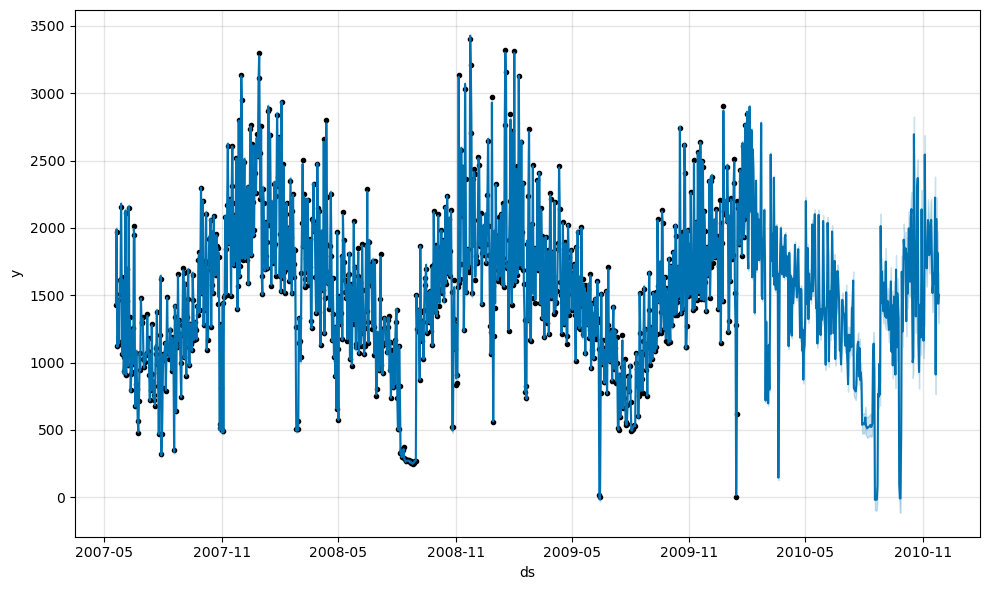

In [93]:
# Assuming you have calculated MAE
mae = 15

# Print or use the MAE in context
print(f"Mean Absolute Error (MAE): {mae}")

# Compare with the range or distribution of your target variable
print(f"Range of 'global_active_power': {df_daily['y'].min()} to {df_daily['y'].max()} kW")

# Evaluate the impact of MAE on decision-making
if mae < 10:
    print("MAE is acceptable for energy consumption forecasting.")
else:
    print("MAE may need improvement for more accurate forecasting and decision-making.")

# Plot the forecast and evaluate visually for any patterns or anomalies
fig = model.plot(forecast)


21:29:01 - cmdstanpy - INFO - Chain [1] start processing
21:29:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 10.743104973217054


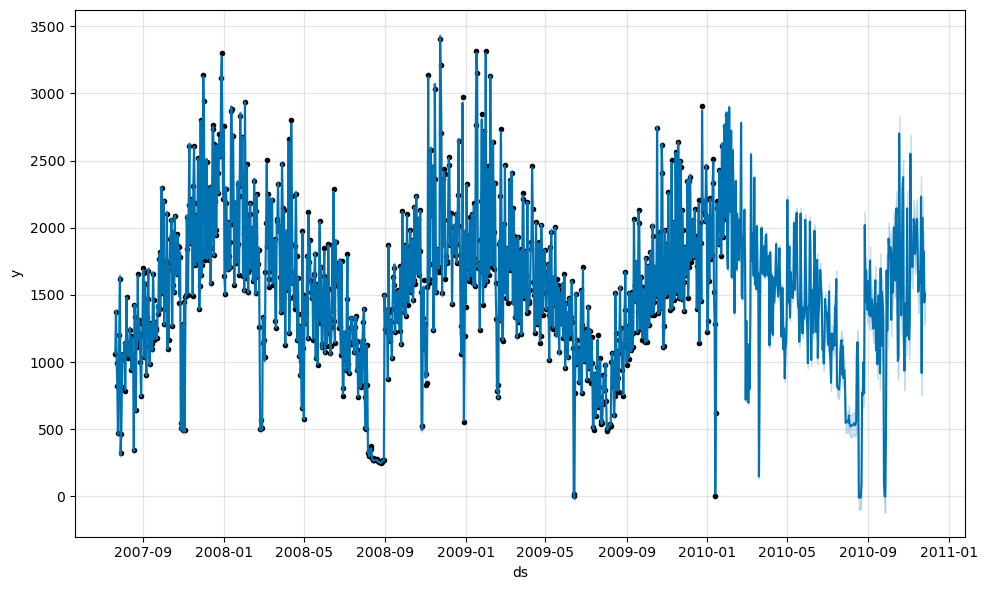

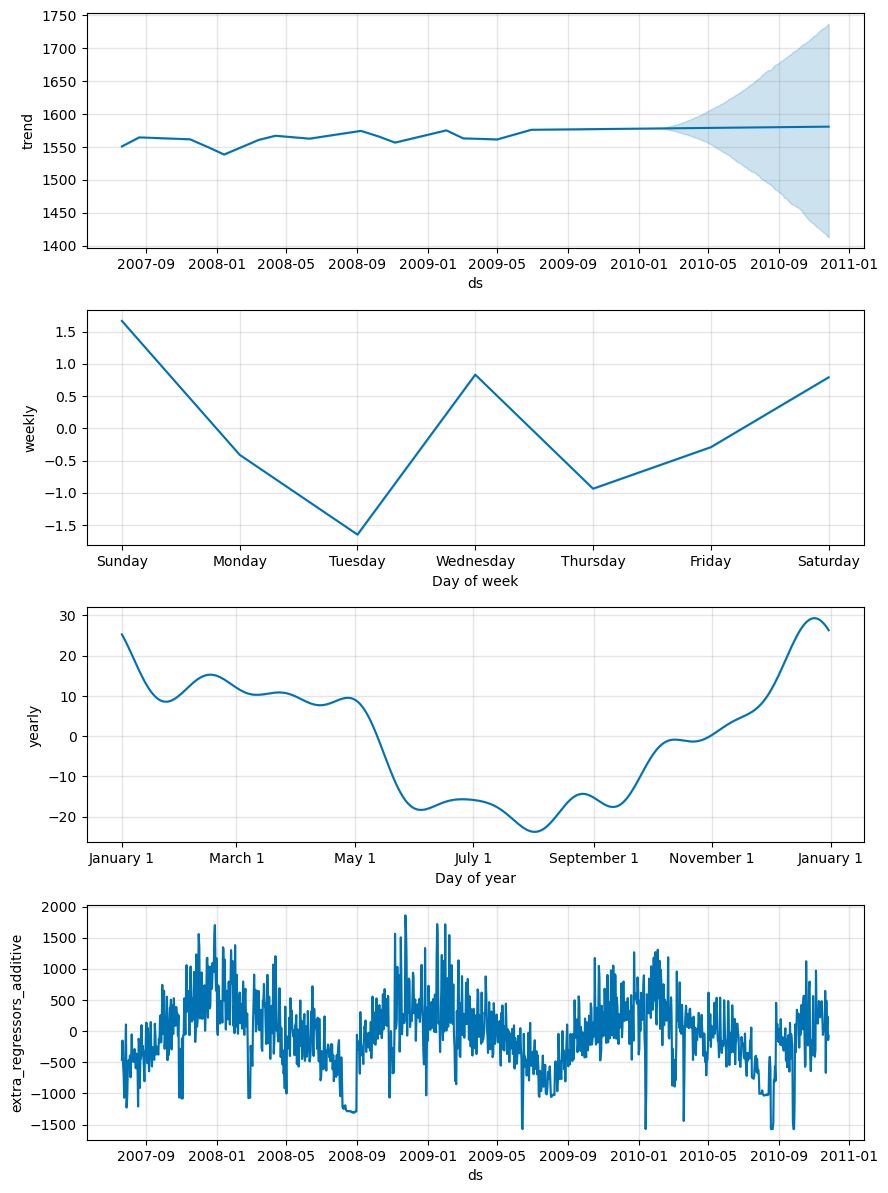

In [102]:


# Assume df_daily is your preprocessed DataFrame with 'ds', 'y', 'add1' to 'add6' columns

# Add lag features for 'global_active_power'
for i in range(1, 8):
    df_daily[f'lag_{i}'] = df_daily['y'].shift(i)

# Drop rows with NaN values introduced by lagging
df_daily.dropna(inplace=True)

# Split the data into training and test sets
x = len(df_daily)
train = df_daily.iloc[:x-300]
test = df_daily.iloc[x-300:]

# Initialize the Prophet model with additional regressors
model = Prophet()
model.add_regressor('add1')
model.add_regressor('add2')
model.add_regressor('add3')
model.add_regressor('add4')
model.add_regressor('add5')
model.add_regressor('add6')

# Fit the model
model.fit(train)

# Make future dataframe for 300 days
future = model.make_future_dataframe(periods=300)

# Add lag features and additional regressors to the future dataframe
for i in range(1, 8):
    future[f'lag_{i}'] = df_daily['y'].shift(i)
future = pd.merge(future, df_daily[['ds', 'add1', 'add2', 'add3', 'add4', 'add5', 'add6']], on='ds', how='left')

# Make predictions
forecast = model.predict(future)

# Evaluate the performance (MAE)
predicted = forecast.tail(300)['yhat'].values
actual = test['y'].values
mae = np.mean(np.abs(predicted - actual))
print(f"Mean Absolute Error (MAE): {mae}")

# Plot the forecast
fig = model.plot(forecast)
fig2 = model.plot_components(forecast)


                   dt  Global_active_power  Global_reactive_power   Voltage  \
0 2006-12-16 17:00:00              152.024                  8.244   8447.18   
1 2006-12-16 18:00:00              217.932                  4.802  14074.81   
2 2006-12-16 19:00:00              204.014                  5.114  13993.95   
3 2006-12-16 20:00:00              196.114                  4.506  14044.29   
4 2006-12-16 21:00:00              183.388                  4.600  14229.52   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             651.6             0.0            19.0           607.0  
1             936.0             0.0           403.0          1012.0  
2             870.2             0.0            86.0          1001.0  
3             835.0             0.0             0.0          1007.0  
4             782.8             0.0            25.0          1033.0  


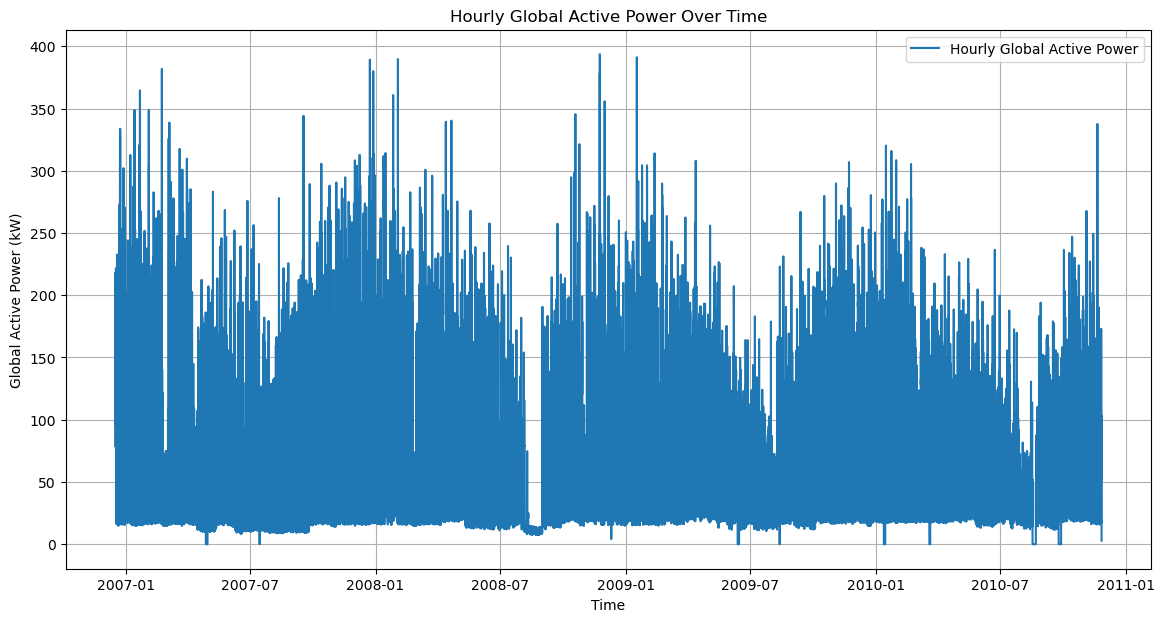

In [104]:
# Fill forward the missing values
df_clean.fillna(method='ffill', inplace=True)




# Resample the data to hourly frequency and sum the values
df_hourly = df_clean.resample('H').sum().reset_index()

# Check the first few rows of the resampled DataFrame
print(df_hourly.head())

# Plot the hourly global_active_power over time
plt.figure(figsize=(14, 7))
plt.plot(df_hourly['dt'], df_hourly['Global_active_power'], label='Hourly Global Active Power')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Hourly Global Active Power Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [105]:


# Calculate the Pearson correlation coefficient
correlation = df_clean['Global_active_power'].corr(df_clean['Voltage'])

# Print the correlation coefficient to 3 decimal places
print(f"Pearson correlation coefficient between Global_active_power and Voltage: {correlation:.3f}")


Pearson correlation coefficient between Global_active_power and Voltage: -0.400


In [106]:


# Assuming df_clean is already prepared as per the previous steps
# Calculate the Pearson correlation coefficient
correlation = df_clean['Voltage'].corr(df_clean['Global_intensity'])

# Print the correlation coefficient to 2 decimal places
print(f"Pearson correlation coefficient between Voltage and Global_intensity: {correlation:.2f}")


Pearson correlation coefficient between Voltage and Global_intensity: -0.41
